In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [45]:
9print(os.listdir('/content/drive/My Drive/BelajarML/dataset/log_Reg'))

['framingham.xls', 'framingham.csv', 'winequalityN.csv']


In [46]:
df = pd.read_csv('/content/drive/My Drive/BelajarML/dataset/log_Reg/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


encoding kolom type dari objek jadi number

In [48]:
df["type"] = df["type"].map({"white": 0, "red": 1})

In [49]:
numeric_cols = df.select_dtypes(include=['number']).columns
imputer_num = SimpleImputer(strategy='mean')

df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

print(df.head())

   type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0   0.0            7.0              0.27  ...       0.45      8.8      6.0
1   0.0            6.3              0.30  ...       0.49      9.5      6.0
2   0.0            8.1              0.28  ...       0.44     10.1      6.0
3   0.0            7.2              0.23  ...       0.40      9.9      6.0
4   0.0            7.2              0.23  ...       0.40      9.9      6.0

[5 rows x 13 columns]


In [50]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   float64
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   float64
dtypes: float64(13)
memory usage: 660.0 KB


,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


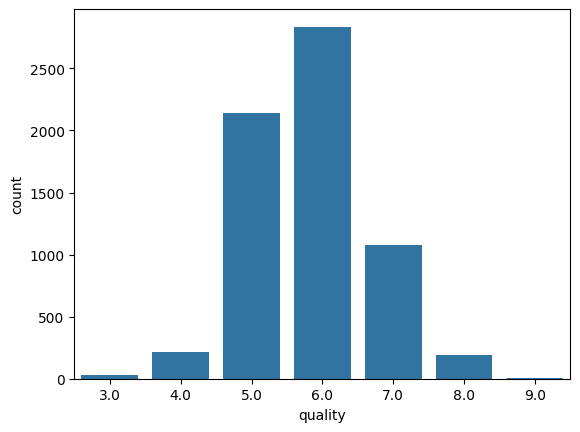

In [51]:
sns.countplot(x=df['quality'])
plt.show()

In [66]:
df["quality_binary"] = (df["quality"] >= 6).astype(int)
df["quality_binary"].value_counts()

,count
quality_binary,
1,4113
0,2384


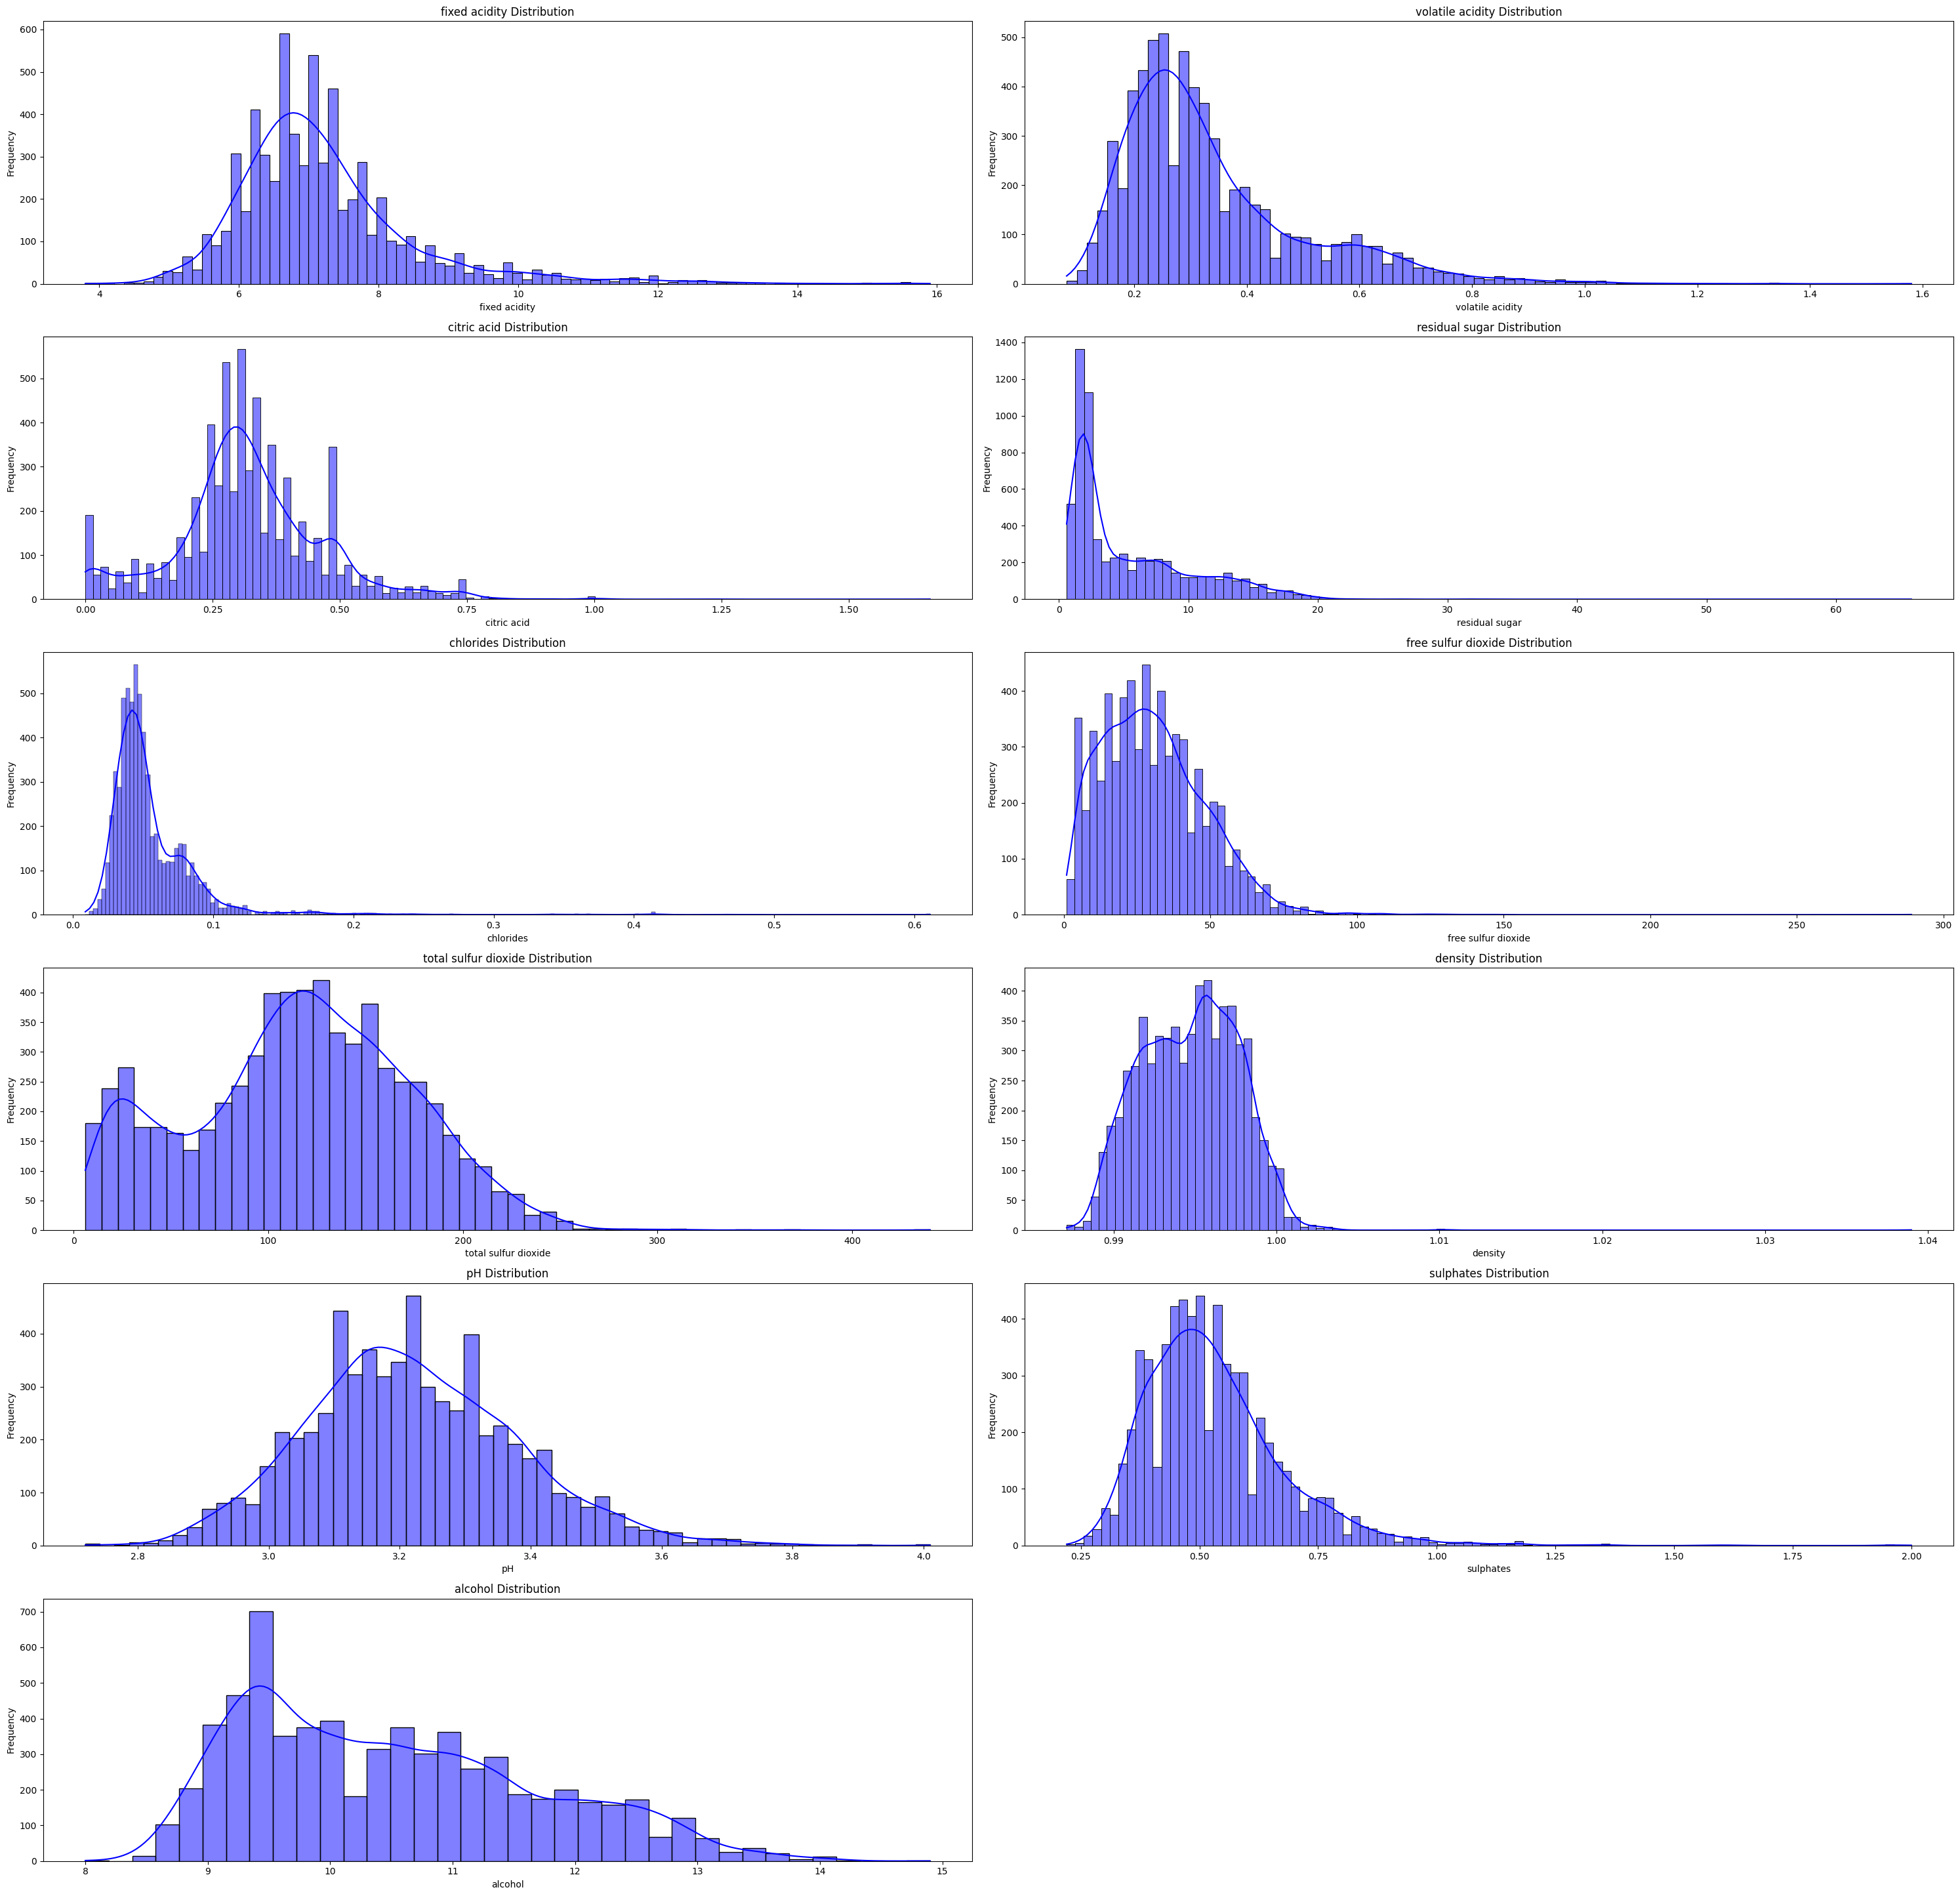

In [53]:
continous_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(30,29))
for i, col in enumerate(continous_columns):
  plt.subplot(6,2,i+1)
  sns.histplot(df[col],color="b", kde=True)
  plt.title(col + " Distribution")
  plt.xlabel(col)
  plt.ylabel("Frequency")

plt.tight_layout()

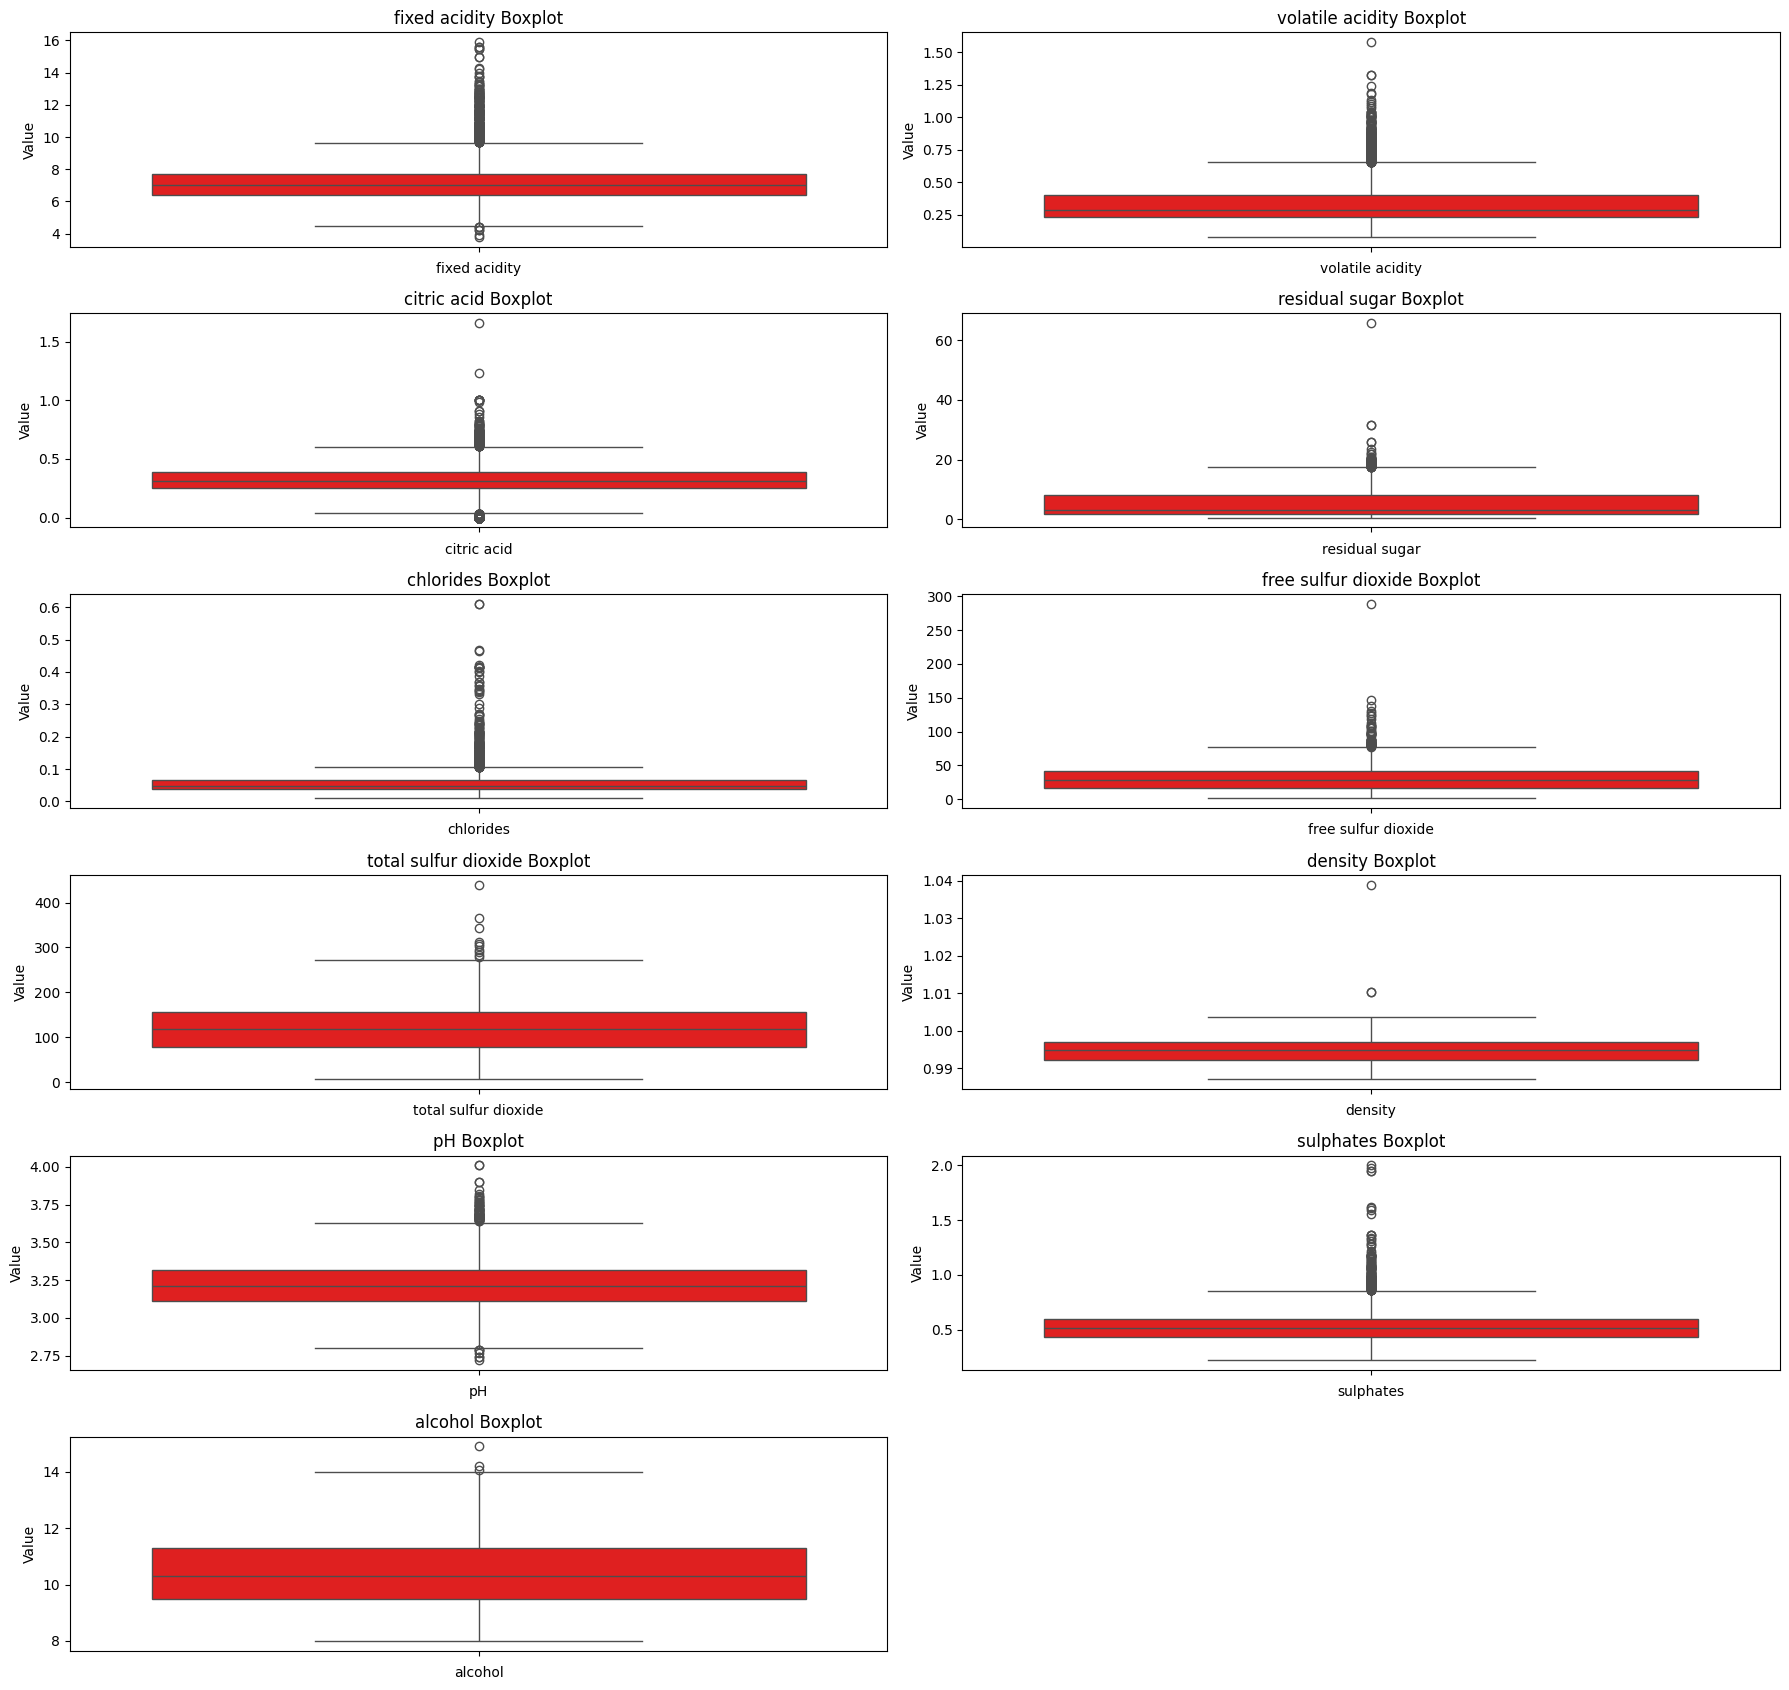

In [54]:
plt.figure(figsize=(18, 17))
for i, col in enumerate(continous_columns):
  plt.subplot(6,2,i+1)
  sns.boxplot(df[col], color='red')
  plt.title(col + " Boxplot")
  plt.xlabel(col)
  plt.ylabel("Value")

plt.tight_layout()

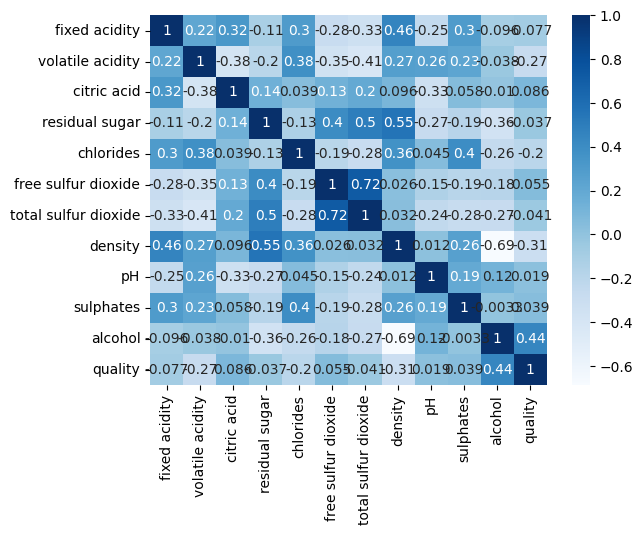

In [36]:
sns.heatmap(df[continous_columns + ["quality"]].corr(),annot=True,cmap="Blues")
plt.show()

quality di hapus, pake quality_binary aja

In [69]:
X = df.drop(["quality", "quality_binary"], axis=1)
y = df["quality_binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [70]:
scale_cols = ['fixed acidity',
              'volatile acidity',
              'citric acid',
              'residual sugar',
              'chlorides',
              'free sulfur dioxide',
              'total sulfur dioxide',
              'density',
              'pH',
              'sulphates',
              'alcohol']

scaler = StandardScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [75]:
log_model = LogisticRegression(
    max_iter=1000,
)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

akurasi = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Akurasi: {akurasi:.3f}")
print(f"Classification Report:\n{cr}")

Akurasi: 0.743
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.53      0.60       716
           1       0.76      0.86      0.81      1234

    accuracy                           0.74      1950
   macro avg       0.73      0.70      0.71      1950
weighted avg       0.74      0.74      0.73      1950



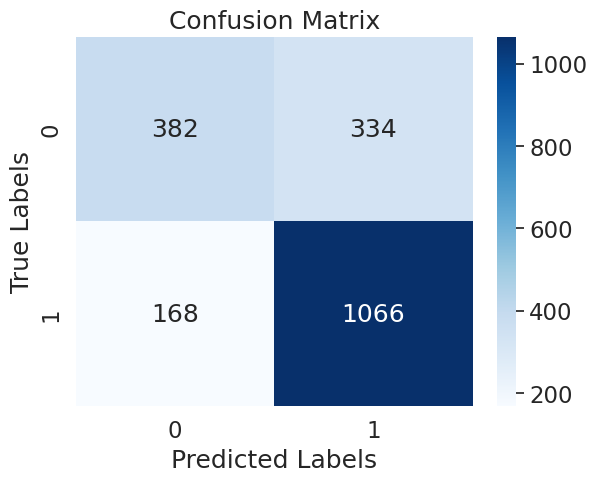

In [74]:
cm = confusion_matrix(y_test, y_pred)

sns.set(style = 'whitegrid', font_scale = 1.5)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()